In [17]:
from sklearn.neighbors import KNeighborsRegressor

In [18]:
knr=KNeighborsRegressor()

In [19]:
knr

KNeighborsRegressor()

In [20]:
import numpy as np

In [21]:
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

In [22]:
import matplotlib.pyplot as plt

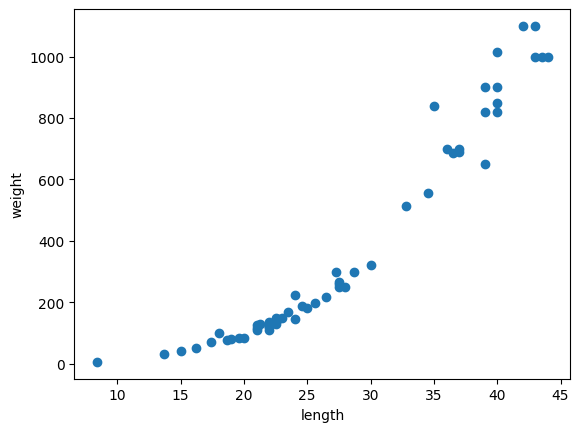

In [23]:
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show() # 양의 상관관계

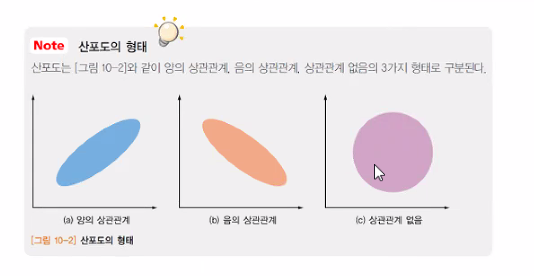

In [24]:
np.corrcoef(perch_length,perch_weight)

array([[1.        , 0.95865587],
       [0.95865587, 1.        ]])

In [25]:
0.95865587**2

0.9190210770854569

### 상관계수에 제곱을 하는 이유

회귀 모델을 만들 때 상관계수의 제곱을 사용하는 이유는 **결정계수(R², Coefficient of Determination)**를 계산하기 위해서입니다. 결정계수는 회귀 모델이 얼마나 잘 데이터를 설명하는지를 나타내는 중요한 지표입니다.

### 상관계수와 결정계수
- **상관계수 \( r \)**: 두 변수 간의 선형적 관계의 강도와 방향을 나타냅니다. 상관계수는 -1에서 1 사이의 값을 가지며, 1에 가까울수록 강한 양의 상관관계를, -1에 가까울수록 강한 음의 상관관계를 나타냅니다. 0에 가까울수록 상관관계가 약하거나 없음을 의미합니다.

- **결정계수 \( R^2 \)**: 상관계수의 제곱으로 계산되며, 회귀 모델이 전체 데이터의 분산 중 얼마나 설명하는지를 나타냅니다. 
  - \( R^2 \) 값은 0에서 1 사이의 값을 가지며, 1에 가까울수록 모델이 데이터를 잘 설명한다는 의미입니다.
  - 예를 들어, \( R^2 = 0.8 \)이라면 모델이 데이터 변동성의 80%를 설명한다고 볼 수 있습니다.

### 왜 제곱을 할까?
상관계수는 변수 간의 선형적 관계의 방향성까지 고려한 값입니다. 하지만 모델의 설명력을 평가할 때는 관계의 방향보다는 **관계의 강도**가 중요합니다. 
- **제곱을 함으로써 방향성을 제거**하고, 오직 관계의 강도만 남기게 됩니다. 
- 이렇게 하면 양의 상관관계든 음의 상관관계든 동일하게 모델의 설명력을 평가할 수 있습니다.

결과적으로, \( R^2 \)는 모델이 종속 변수의 변동을 얼마나 설명하는지를 비율로 나타내므로, 모델의 적합도를 평가하는 데 유용한 지표가 됩니다.

In [26]:
from sklearn.model_selection import train_test_split

In [28]:
X=perch_length
y=perch_weight

In [31]:
len(perch_length)

56

In [32]:
print(56*0.75)
print(56*0.25)

42.0
14.0


In [30]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,
                                               test_size=0.25,shuffle=True)
# X_train,X_test,y_train,y_test=train_test_split(perch_length,perch_weight,random_state=42,
#                                                shuffle=True,test_size=0.25)

In [33]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(42,)
(14,)
(42,)
(14,)


In [34]:
X_train.ndim

1

In [35]:
X_train.reshape(-1,1) # 2차원으로 변경

# reshape(-1, 1): 이 함수는 배열의 구조를 (n, 1) 형태로 변경합니다.

# -1은 "크기에 따라 자동으로 계산해라"라는 의미입니다.
# 즉, 배열의 크기를 유지하면서 나머지 차원의 크기를 자동으로 결정합니다.
# 1은 각 행(row)에 하나의 요소만을 가지는 열(column)을 의미합니다.

array([[19.6],
       [22. ],
       [18.7],
       [17.4],
       [36. ],
       [25. ],
       [40. ],
       [39. ],
       [43. ],
       [22. ],
       [20. ],
       [22. ],
       [24. ],
       [27.5],
       [43. ],
       [40. ],
       [24. ],
       [21. ],
       [27.5],
       [40. ],
       [32.8],
       [26.5],
       [36.5],
       [13.7],
       [22.7],
       [15. ],
       [37. ],
       [35. ],
       [28.7],
       [23.5],
       [39. ],
       [21. ],
       [23. ],
       [22. ],
       [44. ],
       [22.5],
       [19. ],
       [37. ],
       [22. ],
       [25.6],
       [42. ],
       [34.5]])

In [36]:
X_train2d=X_train.reshape(-1,1)

In [37]:
knr.fit(X_train2d,y_train)

KNeighborsRegressor()

In [42]:
X_test2d=X_test.reshape(-1,1)

In [43]:
knr.score(X_test2d,y_test)
# 그냥 엑스 테스트용을 받으면 차원 오류 문제가 발생한다
# 2차원으로 바꿔줘야 한다

0.992809406101064

In [44]:
from sklearn.metrics import mean_absolute_error

In [48]:
X_test2d

array([[ 8.4],
       [18. ],
       [27.5],
       [21.3],
       [22.5],
       [40. ],
       [30. ],
       [24.6],
       [39. ],
       [21. ],
       [43.5],
       [16.2],
       [28. ],
       [27.3]])

In [56]:
#  KNeighborsClassifier,KNeighborsRegressor에서 정해야 하는 하이퍼파라미터(우리가 정해야 할 파라미터)
#  k를 정해야 함, 현재 5를 기준으로 3과 7로 할 경우의 모델을 평가해본다

In [52]:
knr3=KNeighborsRegressor(n_neighbors=3)
knr7=KNeighborsRegressor(n_neighbors=7)

In [54]:
knr3.fit(X_train2d,y_train)

KNeighborsRegressor(n_neighbors=3)

In [55]:
knr3.score(X_train2d,y_train)

0.9804899950518966

In [51]:
knr.score(X_train2d,y_train) # 훈련세트 평가 (과소적합, 과적합여부)

0.9698823289099254

In [57]:
knr7.fit(X_train2d,y_train)

KNeighborsRegressor()

In [58]:
knr7.score(X_train2d,y_train)

0.9698823289099254

In [49]:
predict_value=knr.predict(X_test2d)

In [50]:
mean_absolute_error(X_test2d,predict_value)

296.15000000000003

### Mean Absolute Error (MAE)

회귀 분석에서 모델의 예측 성능을 평가하기 위해 사용되는 대표적인 오차 지표 중 하나

모델의 예측값과 실제값 사이의 차이(오차)를 절대값으로 취한 후, 그 평균을 계산한 값

모델이 얼마나 정확하게 예측하는지를 나타내며, 오차의 크기에 대해 직관적인 해석을 제공합니다



# 확인 문제

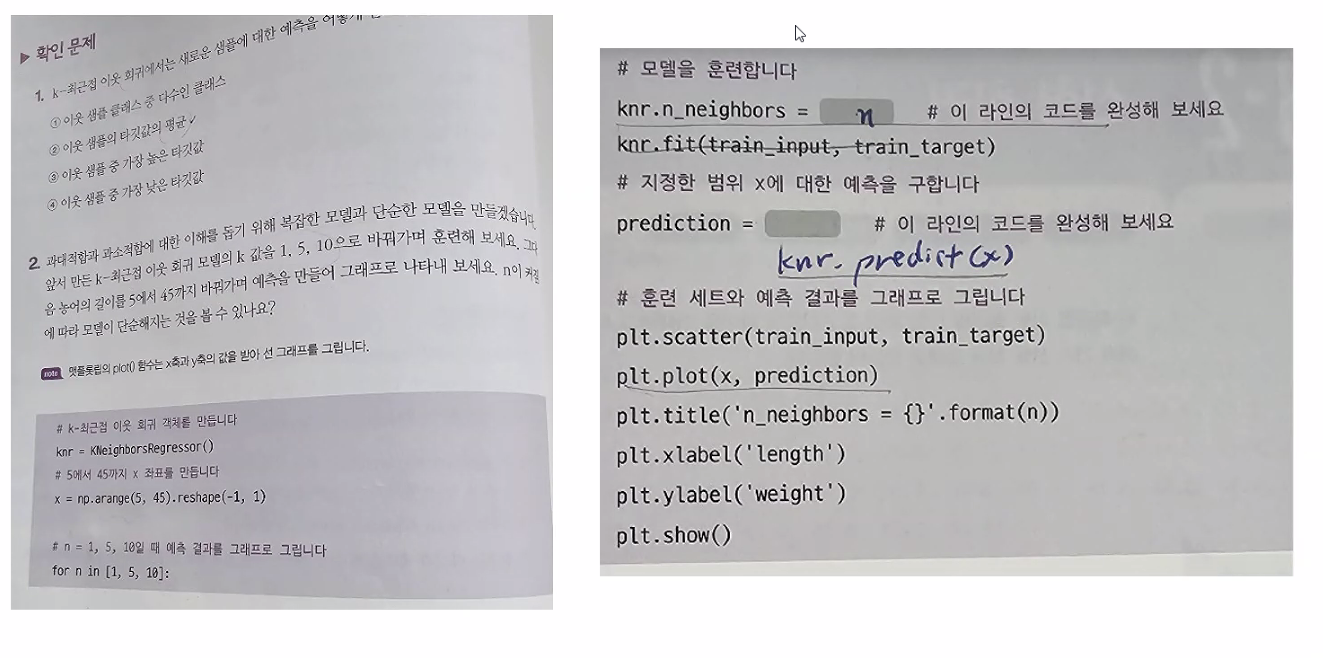

In [63]:
# 1. 1

In [64]:
knr=KNeighborsRegressor()
# k 최근접 이웃 회귀 객체를 만든다

X=np.arange(5,45).reshape(-1,1)
# 5에서 45까지 x 좌표를 만든다
    

In [65]:
knr.n_neighbors

5

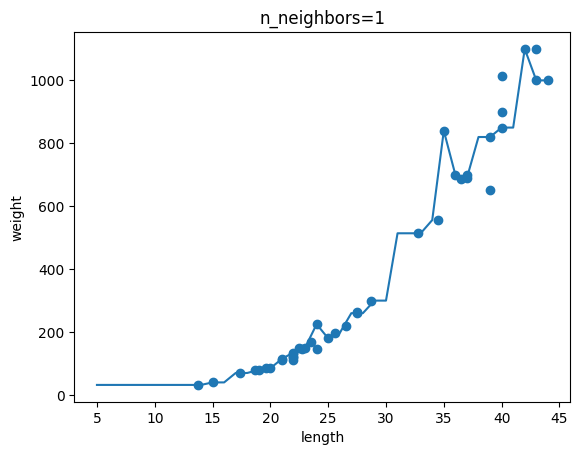

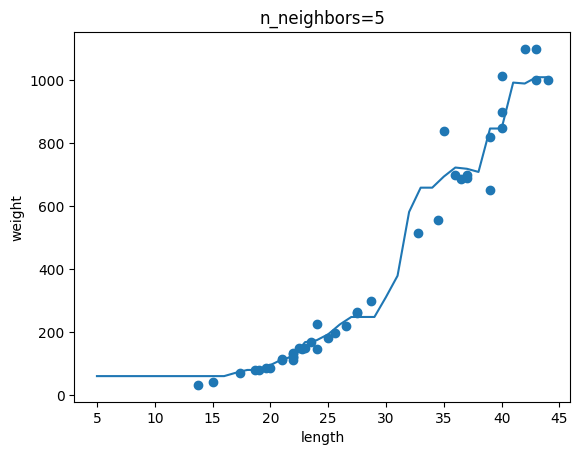

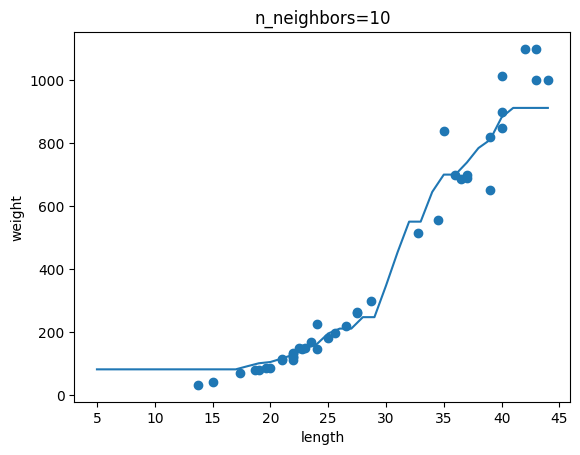

In [66]:
# n이 1,5,10일 때 예측 결과를 그래프로 그린다
for n in [1,5,10]:
    # 모델 훈련
    knr.n_neighbors=n
    knr.fit(X_train2d,y_train)
    prediction=knr.predict(X)
    
    plt.scatter(X_train2d,y_train)
    plt.plot(X,prediction)
    plt.title('n_neighbors={}'.format(n))
    plt.xlabel('length')
    plt.ylabel('weight')
    plt.show()